In [1]:
using DelimitedFiles
using Plots
using Statistics
using LinearAlgebra
using Interpolations

In [2]:
pyplot()

Plots.PyPlotBackend()

In [3]:
fileName = "old-1.log"
name = "old"
data = readdlm(fileName,' ',skipstart=1)

workTimeInd = 1:size(data)[1];
workChanInd = [1;5:6;9:10];

In [4]:
time_old = data[:,workChanInd[1]];
time_old .-= time_old[1];
spec_old = data[:,workChanInd[2:end]];

## Cтарая прошивка
на рисунке ниже представлены шымы измеренные на старой прошивке. Графики получены путем вычитания среднего сигнала.

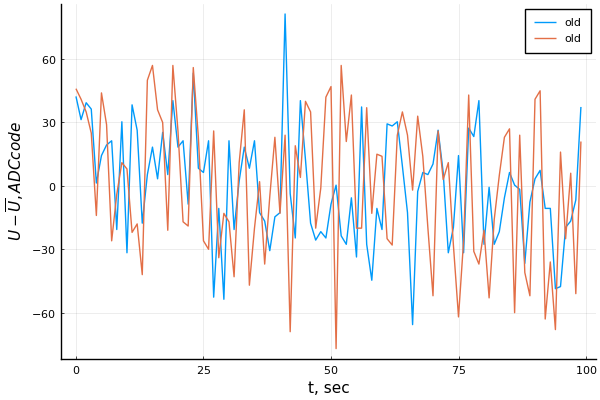

In [5]:
plot(time_old[1:100],spec_old[1:100,3] .- mean(spec_old[1:100,3]),xlabel = "t, sec",ylabel = "\$ U - \\overline{U},  ADC code\$",labels = "old")
plot!(time_old[1:100],spec_old[1:100,4].- mean(spec_old[1:100,4]), labels = "old")

In [6]:
fileName = "new-1.log"
name = "new"
data = readdlm(fileName,' ',skipstart=1)

workTimeInd = 1:size(data)[1];
workChanInd = [1;5:6;9:10];

ind = 700:900;

In [7]:
time_new = data[:,workChanInd[1]];
spec_new = data[:,workChanInd[2:end]];

# Новая прошивка
нарисунке ниже представлены шымы измеренные на новой прошивке.  Графики получены путем вычитания среднего сигнала.

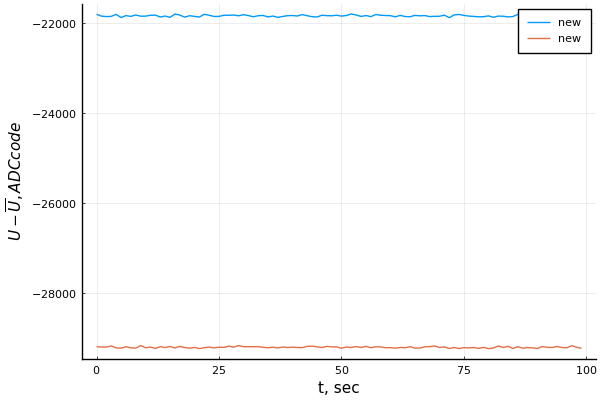

In [8]:
plot(time_old[1:100],spec_new[1:100,1].- mean(spec_new[1:100,3]),xlabel = "t, sec",ylabel = "\$ U - \\overline{U},  ADC code\$", labels = "new")
plot!(time_old[1:100],spec_new[1:100,2].- mean(spec_new[1:100,4]), labels = "new")

# Сравнение прошивок
На рисунке ниже представлены шумы измеренные в старой и новой прошивке, после вычитания наклона.

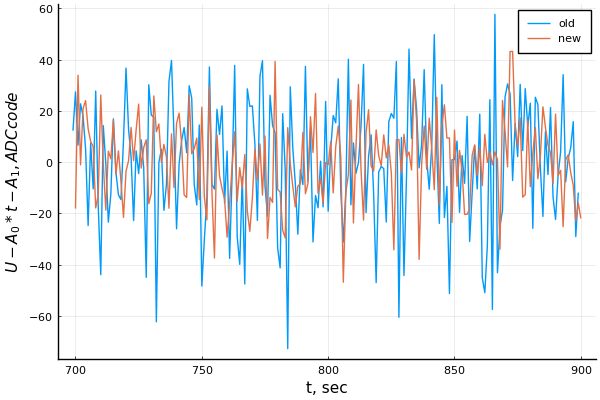

In [9]:
x_old = [time_old[ind] ones(size(ind))]
A_old = x_old\spec_old[ind,3]
y_old = spec_old[ind,3].-x_old*A_old

x_new = [time_new[ind] ones(size(ind))]
A_new = x_new\spec_new[ind,3]
y_new = spec_new[ind,3].-x_new*A_new

plot(time_old[ind],spec_old[ind,3].-x_old*A_old,xlabel = "t, sec",ylabel = "\$ U - A_0*t-A_1, ADC code \$", labels = "old")
plot!(time_new[ind],spec_new[ind,3].-x_new*A_new, labels = "new")

Среднеквадратичное отклонение шума старой прошивки \$ \sigma_{old} \$

In [10]:
std(y_old)

24.264426867562047

Среднеквадратичное отклонение шума новой прошивки \$ \sigma_{new} \$

In [11]:
std(y_new)

15.871174304901375

Отношения среднеквадратичных отклонений шума \$ \sigma_{old} \over {\sigma_{new}}  \$

In [12]:
std(y_old)/std(y_new)

1.528836266391999